# Funzione di probabilità

Un altro modo per rappresentare una distribuzione è tramite  la funzione di probabiltià (probability mass function), che mappa ogni valore nella sua probabilità.

La **probabilità** è la frequenza espressa in frazione del campione *n*. Per ottenere dalla frequenza la probabilità si divide la stessa per il valore n, questo è anche chiamato **normalizzazione**.

Riprendiamo l'esempio del capitolo precedente vedere il risultato

In [2]:
t = [1,2,2,3,5]

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x,0) + 1

hist

{1: 1, 2: 2, 3: 1, 5: 1}

In [4]:
n = len(t)
d = {}
for x, freq in hist.items():
    d[x] = freq/n

d

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}

se sommiamo tutti gli elemento otterremo la probabilità totale con valore 1

## Visualizzare le funzioni di probabilità

Riprendiamo ora l'analisi del problema visto prima analizzando le distribuzioni della PMF

In [5]:
from utils import readReadFemPreg

preg = readReadFemPreg()
live = preg[preg.outcome == 1]

firts = live[live.birthord == 1]
others = live[live.birthord > 1]

In [6]:
pfirst  = firts['prglngth'].value_counts(normalize=True).sort_index()
pothers = others['prglngth'].value_counts(normalize=True).sort_index()

(27.0, 46.0)

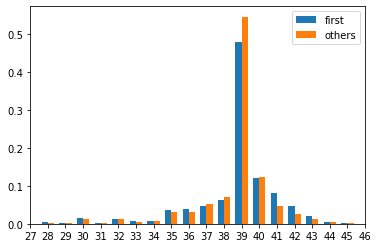

In [7]:
import matplotlib.pyplot as plt
import numpy as np
width = 0.35


fig, ax = plt.subplots()

xs = np.arange(50)
plt.xticks(xs, xs)

ax.bar(pfirst.index - width/2,pfirst.values, width, label='first')
ax.bar(pothers.index + width/2,pothers.values, width, label='others')

plt.legend(loc='upper right')
plt.xlim(27, 46)

Utilizzando la funzione di probabilità possiamo comparare le due distribuzioni senza essere influenzati dalla differenza di dimensione dei campioni, guardando la figura il primo bambino sembra che tenda ad arrivare un pochino dopo tra la 41 esima e la 42 esima settimana.

## Altre visualizzazioni

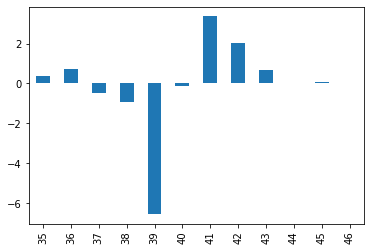

In [8]:
start = 35
end = 46

mask = (pfirst.index >= start) & (pfirst.index <= end)
p1 = pfirst[mask]

mask = (pothers.index >= start) & (pothers.index <= end)
p2 = pothers[mask]

diff = 100 * (p1-p2)

ax = diff.plot.bar()

## Il paradosso della dimensione della classe

Analizziamo un tipo di calcolo che si può fare con la funzione di probabilità. Chiamiamo questo esempio come paradosso della dimensione della classe.

In molti molti scuole e università americane il rapporto tra studente e facoltà e circa 10 a 1. Gli studenti però sono sorpresi di scoprire che la media della dimensione della classe del corso è più grande di 10.

Ci sono due ragioni per la discrepanza:

* Gli studenti tipicamente frequentano 4/5 classi per semestre, ma il professore spesso insegna in una o due
* Il numero di studenti che frequentano classi piccole è piccolo e ovvimante il numero di studenti che frequentano classi grandi e ovviamente ... grande

Il primo punto è ovvio, il secondo è un pochino più subdolo, facciamo un esempio:

Supponiamo che una scuola offra 65 corsi in un determinato semestre con la seguente distribuzione delle dimensioni:

| Dimensione  | Numero |
|---|---|
| 5-9  | 8 |
| 10-14  | 8  |
| 15-19  | 14  |
| 20-24  | 4  |
| 25-29  | 6  |
| 30-34  | 12  |
| 35-39  | 8  |
| 40-44  | 3  |
| 45-49  | 2  |

Se chiediamo al preside la dimensione media di una classe lui calcolerà la media in questo modo:

In [9]:
c = {7:8,12:8,17:14,22:4,27:6,32:12,37:8,42:3,47:2}
tot = sum(c for x, c in c.items())

print("Tot {0}".format(tot))

d = {}

for x,v in c.items():
    d[x] = v / tot

d


Tot 65


{7: 0.12307692307692308,
 12: 0.12307692307692308,
 17: 0.2153846153846154,
 22: 0.06153846153846154,
 27: 0.09230769230769231,
 32: 0.18461538461538463,
 37: 0.12307692307692308,
 42: 0.046153846153846156,
 47: 0.03076923076923077}

In [10]:
print("mean {0:.2f}".format(sum(p * x for x, p in d.items())))

mean 23.69


Se prendiamo dei campioni e calcoliamo la media delle classi ci troveremo un valore ben diverso.

Primo calcoliamo la distribuzione osservata dagli studenti dove la probabilità associata ad ogni classe è aggiustata col numero dei studenti in classe

In [11]:
def biasPMF(pmf):
    p1 = pmf.copy()
    
    for x,v in p1.items():
        p1[x] = v * x
    
    tot = sum(c for x, c in p1.items())
    
    for x,v in p1.items():
        p1[x] = v / tot
    
    return p1

biased = biasPMF(d)
    

In [12]:
print("mean {0:.2f}".format(sum(p * x for x, p in biased.items())))

mean 29.12


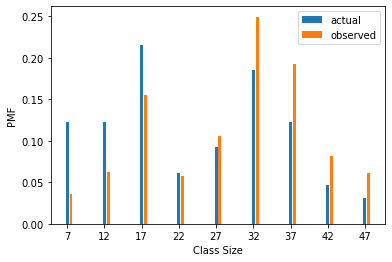

In [26]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.4

x = np.asarray(list(d.keys()))

dvalues = d.values()
bvalues = biased.values()

fig, ax = plt.subplots()
ax.bar(x, dvalues, width, label='actual')
ax.bar(x + 0.5, bvalues, width, label='observed')

ax.set_ylabel('PMF')
ax.set_xlabel('Class Size')


plt.xticks(x, x)

ax.legend()